In [ ]:
import pandas as pd

path = "./archive/medium_articles.csv"

df = pd.read_csv(path, delimiter=",", quotechar='"')

print(df.head())

                              title  \
0               Mental Note Vol. 24   
1         Your Brain On Coronavirus   
2                    Mind Your Nose   
3          The 4 Purposes of Dreams   
4  Surviving a Rod Through the Head   

                                                text  \
0  Photo by Josh Riemer on Unsplash\n\nMerry Chri...   
1  Your Brain On Coronavirus\n\nA guide to the cu...   
2  Mind Your Nose\n\nHow smell training can chang...   
3  Passionate about the synergy between science a...   
4  You’ve heard of him, haven’t you? Phineas Gage...   

                                                 url                 authors  \
0  https://medium.com/invisible-illness/mental-no...            ['Ryan Fan']   
1  https://medium.com/age-of-awareness/how-the-pa...       ['Simon Spichak']   
2  https://medium.com/neodotlife/mind-your-nose-f...                      []   
3  https://medium.com/science-for-real/the-4-purp...  ['Eshan Samaranayake']   
4  https://medium.com/live-y

In [10]:
from collections import Counter

# Compte le nombre de ligne du dataset
df_count = len(df)
print(df_count)

192368


In [ ]:
import ast

# Convertir la colonne 'tags' en listes Python
df['tags'] = df['tags'].astype(str).str.encode('utf-8').str.decode('utf-8')
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
print(df['tags'].head())

0    [Mental Health, Health, Psychology, Science, N...
1    [Mental Health, Coronavirus, Science, Psycholo...
2    [Biotechnology, Neuroscience, Brain, Wellness,...
3    [Health, Neuroscience, Mental Health, Psycholo...
4    [Brain, Health, Development, Psychology, Science]
Name: tags, dtype: object


In [ ]:

# Rassembler tous les tags dans une seule liste
all_tags = [tag for sublist in df['tags'] for tag in sublist]

# Compter la fréquence de chaque tag
tag_counts = Counter(all_tags)

# Convertir en DataFrame pour l'affichage graphique
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Nombre d’articles'])
tag_df = tag_df.sort_values(by='Nombre d’articles', ascending=False)
print(tag_df.head())
tag_df_top = tag_df.head(20)  # Sélectionne les 20 tags les plus fréquents

              Tag  Nombre d’articles
213    Blockchain               7534
102  Data Science               7410
62     Technology               6384
132   Programming               6364
133        Poetry               6336


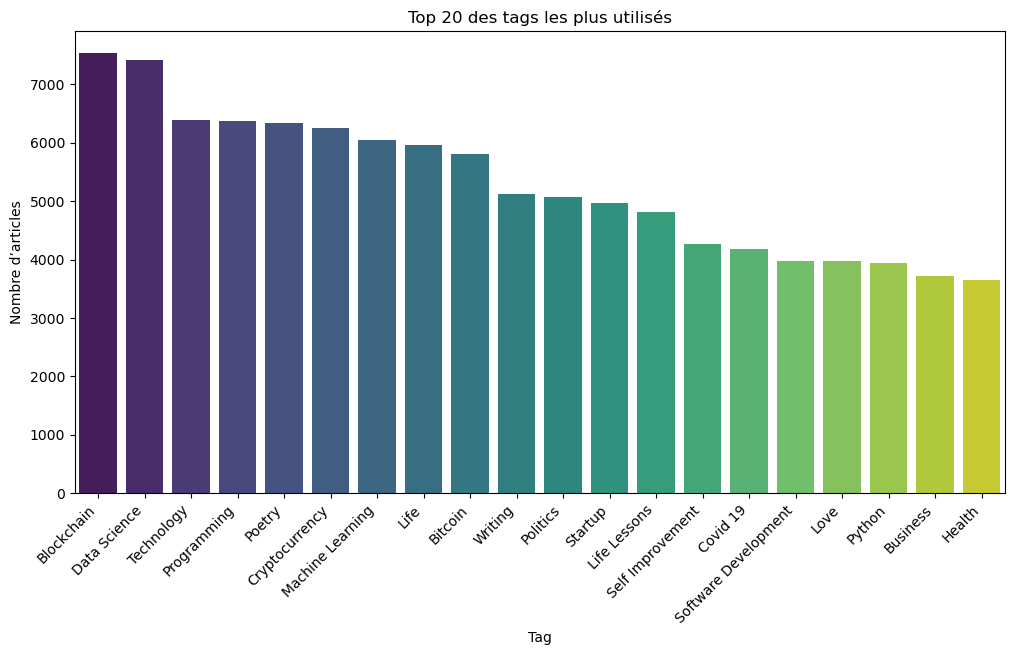

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['axes.unicode_minus'] = False
# Définir la taille du graphique
# ✅ Tracer le graphique avec les 20 tags les plus fréquents
plt.figure(figsize=(12,6))
sns.barplot(x=tag_df_top['Tag'], y=tag_df_top['Nombre d’articles'], palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.title("Top 20 des tags les plus utilisés")
plt.show()

0              ['Ryan Fan']
1         ['Simon Spichak']
2                        []
3    ['Eshan Samaranayake']
4          ['Rishav Sinha']
Name: authors, dtype: object
0              [Ryan Fan]
1         [Simon Spichak]
2             [No author]
3    [Eshan Samaranayake]
4          [Rishav Sinha]
Name: authors, dtype: object
                    Authors  Nombre d’articles
2                 No author              30955
10712       Are You Syrious                206
585           John Au-Yeung                167
1990   The Good Men Project                155
3891             J.D. Harms                152


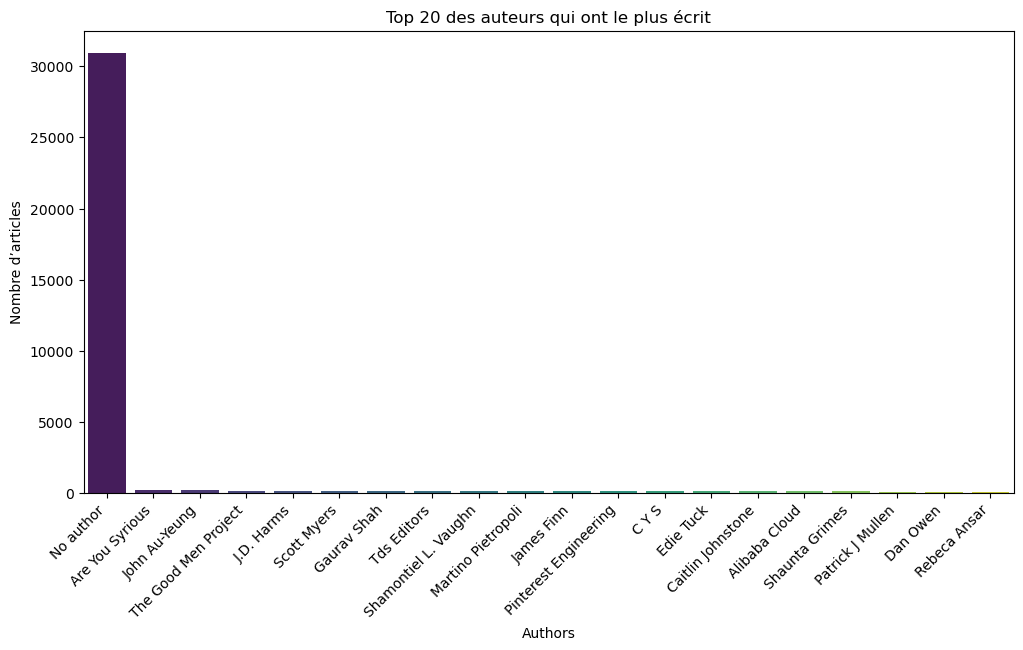

In [5]:
#Classification des auteurs en prenant en compte les articles sans auteurs

print(df['authors'].head())
df['authors'] = df['authors'].astype(str).str.encode('utf-8').str.decode('utf-8')
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
df['authors'] = df['authors'].apply(lambda x: x if len(x) > 0 else ['No author'])
print(df['authors'].head())

# Rassembler tous les tags dans une seule liste
all_NO_authors = [authors for sublist in df['authors'] for authors in sublist]

# Compter la fréquence de chaque tag
NO_authors_counts = Counter(all_NO_authors)

# Convertir en DataFrame pour l'affichage graphique
NO_authors_df = pd.DataFrame(NO_authors_counts.items(), columns=['Authors', 'Nombre d’articles'])
NO_authors_df = NO_authors_df.sort_values(by='Nombre d’articles', ascending=False)
print(NO_authors_df.head())
NO_authors_df_top = NO_authors_df.head(20)  # Sélectionne les 20 tags les plus fréquents

plt.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['axes.unicode_minus'] = False
# Définir la taille du graphique
# ✅ Tracer le graphique avec les 20 tags les plus fréquents
plt.figure(figsize=(12,6))
sns.barplot(x=NO_authors_df_top['Authors'], y=NO_authors_df_top['Nombre d’articles'], palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.title("Top 20 des auteurs qui ont le plus écrit")
plt.show()

0              ['Ryan Fan']
1         ['Simon Spichak']
2                        []
3    ['Eshan Samaranayake']
4          ['Rishav Sinha']
Name: authors, dtype: object
0              [Ryan Fan]
1         [Simon Spichak]
2                      []
3    [Eshan Samaranayake]
4          [Rishav Sinha]
Name: authors, dtype: object
                    Authors  Nombre d’articles
10711       Are You Syrious                206
584           John Au-Yeung                167
1989   The Good Men Project                155
3890             J.D. Harms                152
1065            Scott Myers                143


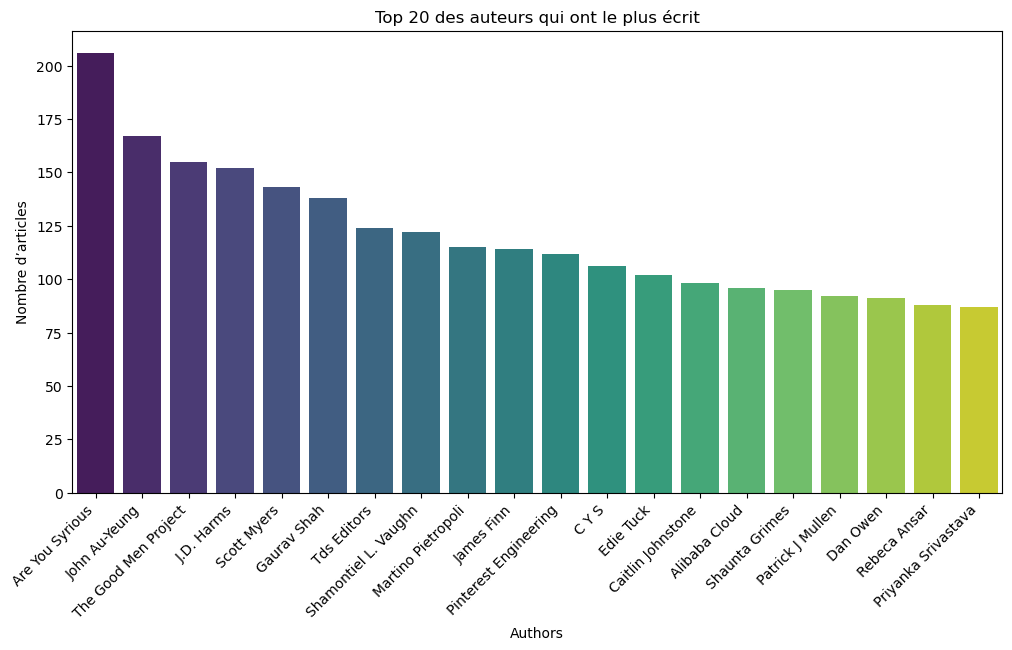

In [ ]:
#Classification des auteurs en prenant en compte les articles sans auteurs

df = pd.read_csv(path, delimiter=",", quotechar='"')

print(df['authors'].head())
df['authors'] = df['authors'].astype(str).str.encode('utf-8').str.decode('utf-8')
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
print(df['authors'].head())

# Rassembler tous les tags dans une seule liste
all_authors = [authors for sublist in df['authors'] for authors in sublist]

# Compter la fréquence de chaque tag
authors_counts = Counter(all_authors)

# Convertir en DataFrame pour l'affichage graphique
authors_df = pd.DataFrame(authors_counts.items(), columns=['Authors', 'Nombre d’articles'])
authors_df = authors_df.sort_values(by='Nombre d’articles', ascending=False)
print(authors_df.head())
authors_df_top = authors_df.head(20)  # Sélectionne les 20 tags les plus fréquents

plt.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['axes.unicode_minus'] = False
# Définir la taille du graphique
# ✅ Tracer le graphique avec les 20 tags les plus fréquents
plt.figure(figsize=(12,6))
sns.barplot(x=authors_df_top['Authors'], y=authors_df_top['Nombre d’articles'], palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.title("Top 20 des auteurs qui ont le plus écrit")
plt.show()